In [1]:
cd /Users/atreyamisra/Google \Drive/Downloads/nn_compsensing/tfupgraded_src/

/Users/atreyamisra/Google Drive/Downloads/nn_compsensing/tfupgraded_src


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators
import scipy.ndimage

Number 2 Starts Here:

In [3]:
# define the graph
sess = tf.Session()
z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

In [4]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [5]:
# generate images
s=(1,100)
s=np.zeros(s)
s[0,0]=1
feed_dict = {z : s}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

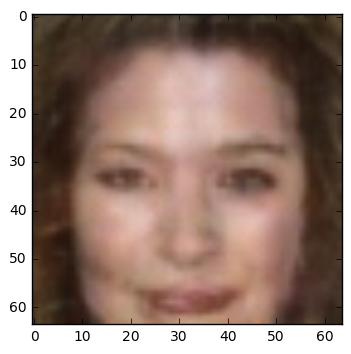

In [6]:
# inspect
im_idx = 0
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

Number 3 Starts Here:

In [7]:
sess2 = tf.Session()

train_a=tf.train.AdamOptimizer()
with tf.variable_scope(tf.get_variable_scope(),reuse=False) as scope:
    actual=tf.placeholder(tf.float32,shape=[1,64,64,3],name="actual")
    
    z=tf.get_variable(name="z", initializer=tf.random_uniform_initializer(dtype=tf.float32), shape=[1, 100])
    with tf.variable_scope("inner"):
        x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess2)
    #error=tf.sqrt(tf.square(tf.norm(dcgan_utils.inverse_transform(x_hat))-tf.norm(actual)))
    #error=tf.square(tf.norm(dcgan_utils.inverse_transform(x_hat)-actual))
    error=tf.sqrt(tf.square(tf.norm(dcgan_utils.inverse_transform(x_hat-actual))))
    
    print(error.name)
    train_a=train_a.minimize(error)    


model = tf.global_variables_initializer()
sess2.run(model)


pic=scipy.ndimage.imread("/Users/atreyamisra/Downloads/pic.jpeg")

pic=pic[np.newaxis,...]

for x in range(0,100):
    sess2.run(train_a,feed_dict={actual:pic})
    if x%10==0:
        print(x)

z_New=sess2.run(z)

Sqrt:0
0
10
20
30
40
50
60
70
80
90


227572133.467


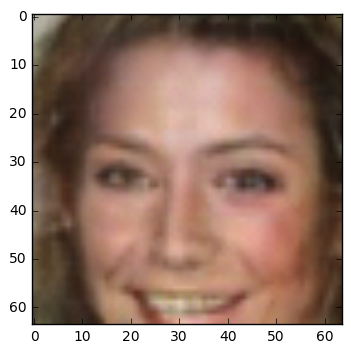

[[ 0.31475919  0.2307526   0.90382826  0.03117051  0.57615256  0.34361497
   0.09598228  0.57235414  0.57940209  0.28348678  0.22086912  0.39880231
   0.66622996  0.11561061  0.9861871   0.24720784  0.86144358  0.5843159
   0.13888934  0.01780431  0.65758991  0.98644435  0.39108029  0.2711058
   0.3068091   0.28999448  0.11132172  0.12072665  0.06378886  0.37172195
   0.656762    0.24103934  0.50632173  0.93998569  0.25233918  0.34676197
   0.55530626  0.84122181  0.89938682  0.83397323  0.39058587  0.72741866
   0.28491253  0.27750131  0.3349354   0.14373307  0.61232555  0.80057794
   0.44157103  0.44529039  0.17200075  0.27518326  0.34714782  0.50146323
   0.30526939  0.66047293  0.01448781  0.65955776  0.05850162  0.75625682
   0.23220076  0.18403728  0.07898877  0.36700121  0.62864703  0.03011426
   0.57317901  0.29288131  0.6269111   0.6714052   0.67524612  0.54390633
   0.04008655  0.20927602  0.40727651  0.44729882  0.96148187  0.78996223
   0.01663237  0.38723838  0.27331349  0

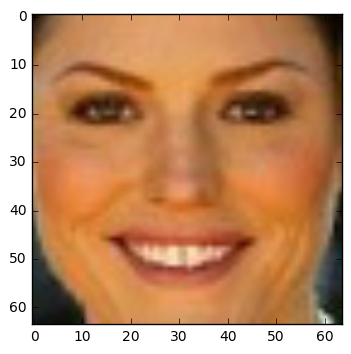

In [8]:
z_New=sess2.run(z)

z_New_Tensor=tf.placeholder(tf.float32,[1,100])

x_hat2, restore_dict2, restore_path2 = celebA_estimators.dcgan_gen(z_New_Tensor, sess2)


restorer2 = tf.train.Saver(var_list=restore_dict2)
restorer2.restore(sess2, restore_path2)

x_hat_val2 = sess2.run(x_hat2, feed_dict={z_New_Tensor:z_New})

for x in range(0,1):
    print(np.linalg.norm(dcgan_utils.inverse_transform(x_hat_val2[x])-pic[x])**2)
plt.imshow(dcgan_utils.inverse_transform(x_hat_val2[0]))
plt.show()
print(z_New)
plt.imshow(pic[0])
plt.show()

In [9]:
sess.close()
sess2.close()